# Multiclass classification difference

# Linear SVC(i)

In [8]:
import numpy as np
from mnist import MNIST
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn import svm
from sklearn import model_selection

In [9]:
mndata = MNIST('./samples')

images, labels = mndata.load_training()

testimages, testlabls = mndata.load_testing()

In [10]:
train = np.array(images,dtype='float64')
trainlabels=np.array(labels,dtype='float64')
test = np.array(testimages,dtype='float64')
testlabels=np.array(testlabls,dtype='float64')

In [11]:
def accuracy(labels,truelabels):
    count= len(np.where(labels-truelabels==0)[0])
    return (count/len(labels))*100

In [12]:
c_vec=[0.01,0.05,0.1,0.5,1,10,25,50,100,250,500,1000]

In [41]:
clf=[]
for i in range(len(c_vec)):
    clf.insert(i,svm.LinearSVC(C=c_vec[i],dual=False))
    clf[i].fit(train,trainlabels)

In [5]:
with open('./l_svm_models.p', 'rb') as y:
    clf = pickle.load(y)

In [8]:
testpred=[]
testacc=[]
trainpred=[]
trainacc=[]
coef=[]
for i in range(len(c_vec)):
    testpred.insert(i,clf[i].predict(test))
    testacc.insert(i,accuracy(testpred[i],testlabels))
    trainpred.insert(i,clf[i].predict(train))
    trainacc.insert(i,accuracy(trainpred[i],trainlabels))
    coef.insert(i,clf[i].coef_)

In [9]:
print(testacc)
print(trainacc)

[91.72, 91.74, 91.72, 91.69, 91.7, 91.7, 91.7, 91.72, 91.63, 91.75, 91.72, 91.73]
[92.76833333333333, 92.77166666666666, 92.755, 92.75666666666666, 92.74333333333334, 92.76333333333334, 92.735, 92.76833333333333, 92.77666666666666, 92.77666666666666, 92.77666666666666, 92.76666666666667]


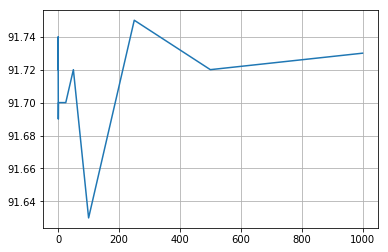

In [10]:
plt.plot(c_vec,testacc)
plt.grid()
plt.show()


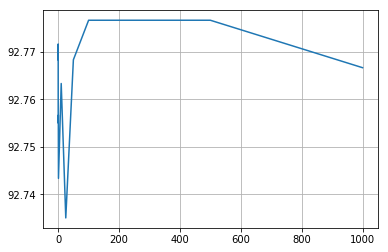

In [11]:
plt.plot(c_vec,trainacc)
plt.grid()
plt.show()

# Linear SVC(ii)

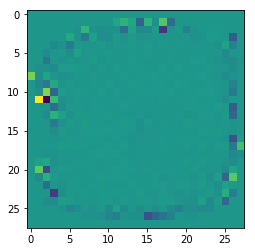

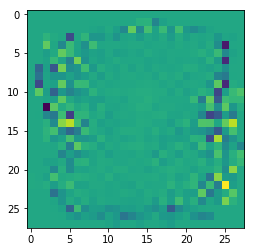

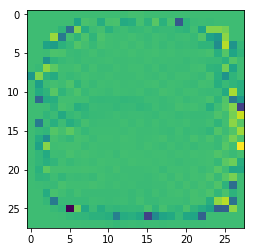

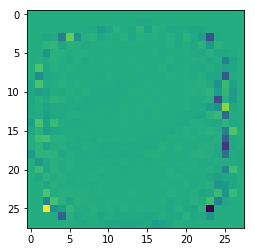

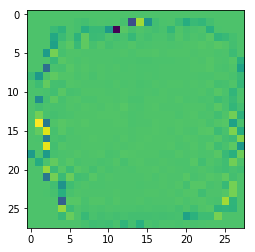

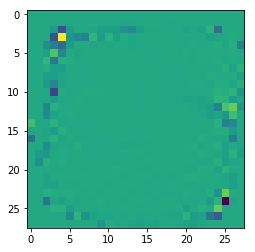

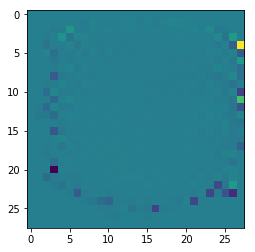

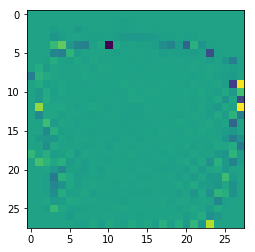

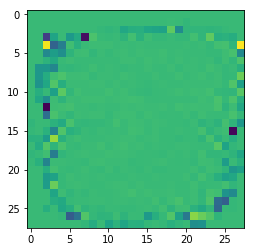

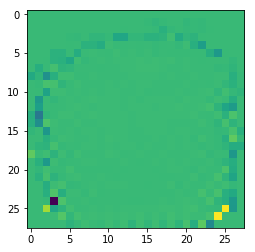

In [12]:
for i in range(10):
    w=coef[1][i]
    plt.imshow(w.reshape(28,28))
    plt.show()

# LinearSVC(iii)

In [14]:
c_vec=[0.01,0.05,0.1,0.5,1,10,25,50,100,250,500,1000]

In [17]:
clf_l1=[]
for i in range(len(c_vec)):
    clf_l1.insert(i,svm.LinearSVC(C=c_vec[i],dual=False,penalty='l1'))
    clf_l1[i].fit(train,trainlabels)

In [18]:
with open('./l_svml1_models.p', 'wb') as y:
    pickle.dump(clf_l1, y)

In [17]:
with open('./l_svml1_models.p', 'rb') as y:
    clf_l1 = pickle.load(y)

In [18]:
testpredl1=[]
testaccl1=[]
trainpredl1=[]
trainaccl1=[]
coefl1=[]
for i in range(len(c_vec)):
    testpredl1.insert(i,clf_l1[i].predict(test))
    testaccl1.insert(i,accuracy(testpredl1[i],testlabels))
    trainpredl1.insert(i,clf_l1[i].predict(train))
    trainaccl1.insert(i,accuracy(trainpredl1[i],trainlabels))
    coefl1.insert(i,clf_l1[i].coef_)

In [19]:
print(testaccl1)
print(trainaccl1)

[91.81, 91.72, 91.74, 91.67, 91.66, 91.60000000000001, 91.60000000000001, 91.60000000000001, 91.60000000000001, 91.61, 91.60000000000001, 91.60000000000001]
[92.685, 92.73833333333333, 92.76333333333334, 92.78333333333333, 92.78833333333333, 92.79333333333334, 92.795, 92.79333333333334, 92.795, 92.79666666666667, 92.79666666666667, 92.795]


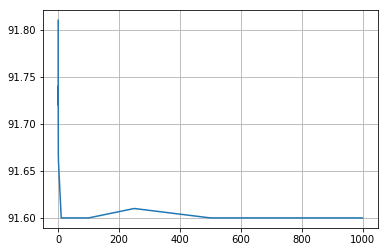

In [20]:
plt.plot(c_vec,testaccl1)
plt.grid()
plt.show()


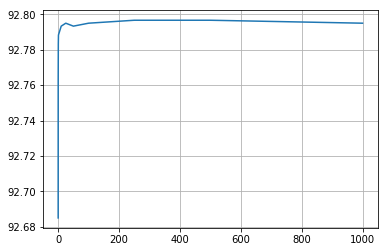

In [21]:
plt.plot(c_vec,trainaccl1)
plt.grid()
plt.show()

# Linear SVC WITH L1 COEFFICIENTS

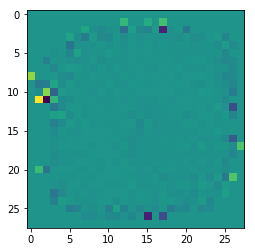

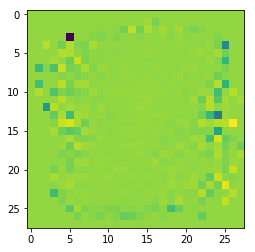

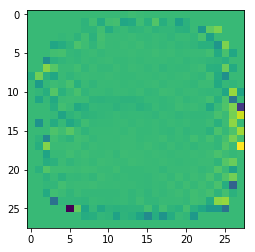

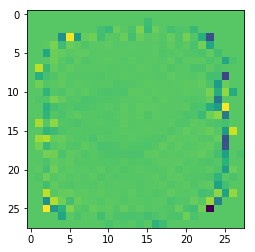

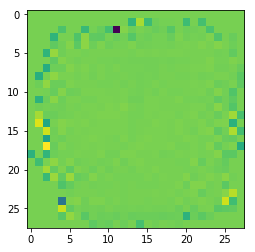

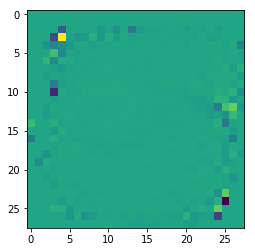

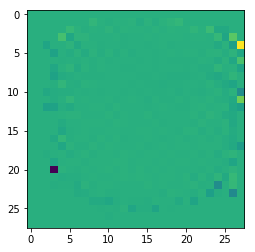

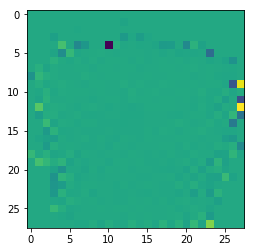

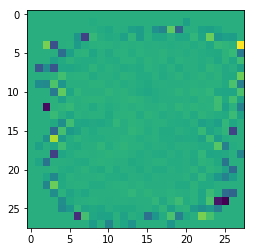

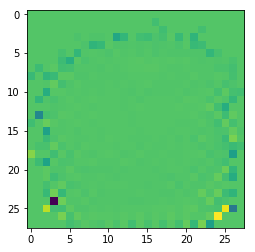

In [22]:
for i in range(10):
    w=coefl1[1][i]
    plt.imshow(w.reshape(28,28))
    plt.show()

# SVC

In [ ]:
c_vec=[0.01,0.05,0.1,0.5,1,10,25,50,100,250,500,1000]
gamma=[]

# ROUGH

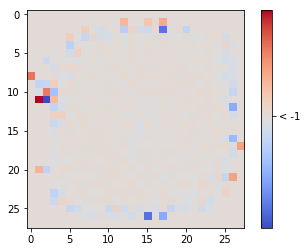

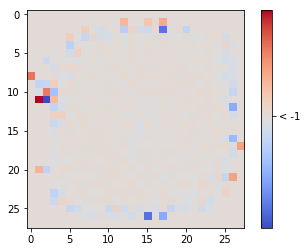

In [26]:


import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy.random import randn

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()

data=coefl1[1][0]

cax = ax.imshow(data.reshape(28,28), interpolation='nearest', cmap=cm.coolwarm)
#ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=range(w))
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [66]:
clftemp = svm.LinearSVC(dual=False,penalty='l1')

In [67]:
clftemp.fit(train,trainlabels)

TypeError: '<' not supported between instances of 'list' and 'int'

In [63]:
predtemp=clftemp.predict(test)

In [64]:
print(accuracy(predtemp,testlabels))

91.66


In [11]:
with open('./l_svm_models.p', 'rb') as y:
   clf_stored = pickle.load(y)

In [13]:
testpredtemp=[]
testacctemp=[]
trainpredtemp=[]
trainacctemp=[]
coeftemp=[]
for i in range(len(c_vec)):
    testpredtemp.insert(i,clf_stored[i].predict(test))
    testacctemp.insert(i,accuracy(testpredtemp[i],testlabels))
    trainpredtemp.insert(i,clf_stored[i].predict(train))
    trainacctemp.insert(i,accuracy(trainpredtemp[i],trainlabels))
    coeftemp.insert(i,clf_stored[i].coef_)

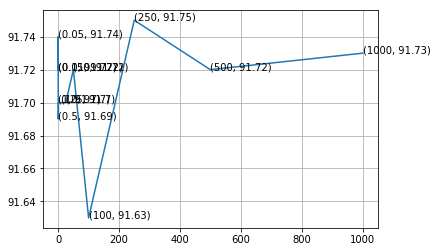

In [29]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(c_vec,testacctemp)
for xy in zip(c_vec,testacctemp):                        
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 

plt.grid()
plt.show()

In [16]:
trainindex=np.random.randint(0,60000,100)
t=train[trainindex,:]
tl=trainlabels[trainindex]
print(tl.shape)
                            

(100,)


In [ ]:
import time
start = time.time()
clf.fit(train,trainlabels)
end = time.time()
print(end - start)

In [20]:
gamma_range = np.logspace(-3, 3, 5)
print(gamma_range)
c_range=[0.01,0.1,1,100,1000]

[  1.00000000e-03   3.16227766e-02   1.00000000e+00   3.16227766e+01
   1.00000000e+03]


In [22]:
parameters = {'kernel':['rbf'],'gamma':gamma_range,'C':c_range}
svc = svm.SVC()
clf_svc = model_selection.GridSearchCV(svc, parameters)
clf_svc.fit(train,trainlabels)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'gamma': array([  1.00000e-03,   3.16228e-02,   1.00000e+00,   3.16228e+01,
         1.00000e+03]), 'C': [0.01, 0.1, 1, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
with open('./svm_rbf.p', 'wb') as y:
    pickle.dump(clf_svc, y)

In [23]:

clf.fit(train,trainlabels)
end = time.time()
print(end - start)

C:\Users\sthabass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sthabass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sthabass\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*wa

{'mean_fit_time': array([ 0.00800467,  0.0080061 ,  0.00800006,  0.00733352,  0.0076708 ,
         0.00801015,  0.00833122,  0.00766961,  0.00734369,  0.0080111 ,
         0.0079999 ,  0.00734409,  0.00800411,  0.00767374,  0.00768383,
         0.00800896,  0.00800514,  0.00734011,  0.00734011,  0.0080057 ,
         0.00767183,  0.00767207,  0.00700498,  0.00733717,  0.00767215]),
 'mean_score_time': array([ 0.00200144,  0.00266862,  0.00200709,  0.00200613,  0.00200288,
         0.00200129,  0.00200184,  0.00199874,  0.00200129,  0.00200176,
         0.00233444,  0.00200152,  0.00199684,  0.00200129,  0.0019958 ,
         0.00199962,  0.00200796,  0.00233674,  0.00199548,  0.00200327,
         0.00233507,  0.00200152,  0.0020016 ,  0.00166806,  0.0016679 ]),
 'mean_test_score': array([ 0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13,
         0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13,
         0.13,  0.13,  0.13,  0.13,  0.13,  0.13,  0.13]),
 'mean_tra

In [17]:
clf_rbf=[]
for i in range(len(gamma_range)):
    clf_gamma=[]
    for j in range(len(c_vec)):
        clf_gamma.insert(j,svm.SVC(C=c_vec[j],kernel='rbf',gamma=gamma_range[i]))
        clf_gamma[j].fit(t,tl)
    clf_rbf.insert(i,clf_gamma)
        

In [19]:
print(len(clf_rbf[0]))

12


In [18]:
with open('./l_svml1_models.p', 'wb') as y:
    pickle.dump(clf_l1, y)

In [17]:
with open('./l_svml1_models.p', 'rb') as y:
    clf_l1 = pickle.load(y)